# <code style="background:#6c89cc; color:black">Project Details</code>

The objective of the project is to let students have a hands-on experience on machine 
learning application development, this will help the students to have a better 
understanding on the topics and algorithms learned. Specifically in problem formulation, 
data collection and processing, data analysis, experiment design, machine learning 
methods comparison, performance evaluation, and result analysis. Each group has its 
flexibility to choose its own problem and data.

# <code style="background:#6c89cc; color:black">Problem Background</code>

Diseases are something that plague human beings. The top 10 causes of death in the world are all diseases, not accidents. Out of these 10, 7 of them account for diseases that are noncommunicable. These means that they are diseases that are not transmitted from one person to another. These account for 68% of the top 10 causes of death. If we frame this context at a national level, Singapore shares the same sentiment. The top 10 causes of death are also due to diseases. One such disease that we wanted to explore is stroke as it is in the top 5 causes of death worldwide and in Singappore. By taking into account the age-old idiom, "Prevention is better than cure", we want to delve deep into the details to figure out how to improve one's health.
<br>
<br>
https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death
<br>
https://www.moh.gov.sg/others/resources-and-statistics/principal-causes-of-death

# <code style="background:#6c89cc; color:black">Problem Statement</code>

This project aims to analyse and predict the probability of stroke based of the sourced dataset. They take into account lifestyle habits and medical history to aid with with the analysis of data as well as the training of models.

# <code style="background:#6c89cc; color:black">Data Collection</code>

The dataset used for this problem statement was sourced from Kaggle, a dataset hosting website. It consists of 11 variables, 10 of which are features and 1 of it being the target. The features variables consist of behavioural attributes as well as hereditary attributes that affect a person's probability of getting a stroke.

# <code style="background:#6c89cc; color:black">Load the Libraries</code>

In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
# from flask import Flask, request, render_template
import joblib



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn import preprocessing

import numpy as np
import seaborn as sns

from matplotlib.pylab import seed

from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
# ...and other regression models

# <code style="background:#6c89cc; color:black">Load the Dataset</code>

In [2]:
df = pd.read_csv("../Datasets/stroke_data.csv")

In [3]:
df.shape

(40910, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


# <code style="background:#6c89cc; color:black">Data Exploration</code>

In [5]:
#Assessing for missing values
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
#Evaluating number of unique values in each column
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#Presenting the findings using a dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

,Unique_Values
sex,2
age,111
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,2903
bmi,370
smoking_status,2


In [7]:
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
cols=['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']

# <code style="background:#6c89cc; color:black">Feature Engineering</code>

In [9]:
df = df.dropna()

In [10]:
#Assessing for missing values
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.shape

(40907, 11)

# <code style="background:#6c89cc; color:black">Creating Models</code>

In [12]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [14]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [15]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': SGDClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      4026
           1       0.72      0.61      0.66      4156

    accuracy                           0.68      8182
   macro avg       0.69      0.68      0.68      8182
weighted avg       0.69      0.68      0.68      8182

Training Decision Tree...
Decision Tree Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4026
           1       1.00      1.00      1.00      4156

    accuracy                           1.00      8182
   macro avg       1.00      1.00      1.00      8182
weighted avg       1.00      1.00      1.00      8182

Training Random Forest...
Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4026
           1       0.99      1.00      1.00      4156

    a

c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      4026
           1       0.75      0.66      0.70      4156

    accuracy                           0.72      8182
   macro avg       0.72      0.72      0.72      8182
weighted avg       0.72      0.72      0.72      8182

Training Naive Bayes...
Naive Bayes Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.63      0.80      0.70      4026
           1       0.73      0.54      0.62      4156

    accuracy                           0.67      8182
   macro avg       0.68      0.67      0.66      8182
weighted avg       0.68      0.67      0.66      8182

Training MLP Neural Network...
MLP Neural Network Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4026
           1       0.88      0.92      0.90      4156

    accuracy                           0.8

c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.68
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
SVM Accuracy: 0.77
KNN Accuracy: 0.87
Gradient Boosting Accuracy: 0.80
XGBoost Accuracy: 0.68


c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.72
Naive Bayes Accuracy: 0.67
MLP Neural Network Accuracy: 0.89


c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


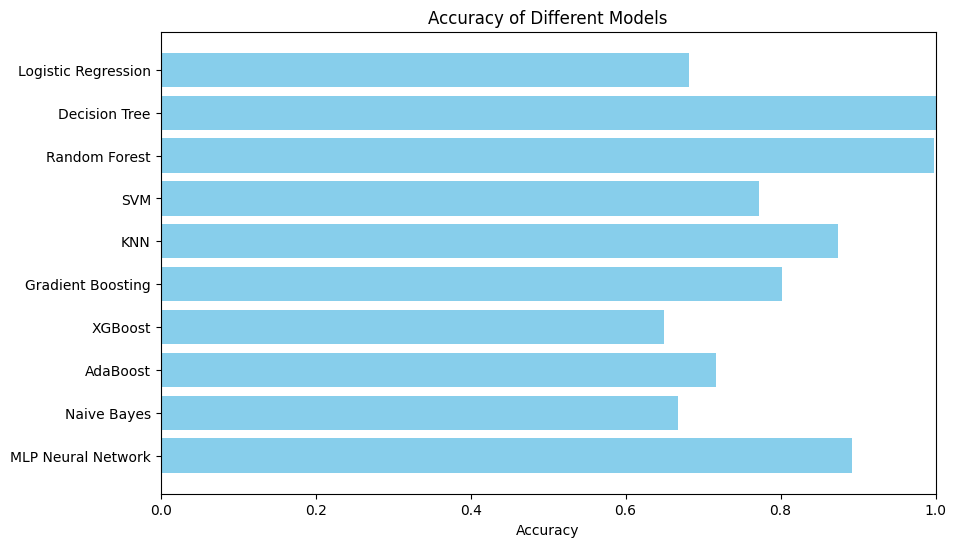

In [18]:
# Dictionary to store accuracies
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.show()

In [19]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confusion matrix
[[3073  953]
 [ 291 3865]]


Accuracy of K-NeighborsClassifier: 84.79589342459056 

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      4026
           1       0.80      0.93      0.86      4156

    accuracy                           0.85      8182
   macro avg       0.86      0.85      0.85      8182
weighted avg       0.86      0.85      0.85      8182

